# Linear Regression:

## Section 1: EDA

- **Importing Data and packages:**

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\\Study\\AnalytixLabs\\7 - Python\\Class 16 & 17\\Linear Regression Bank Loans\\datasets\\LoansData.csv')

display(df, df.dtypes)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,2497,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,2498,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,2499,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


LoanID                              int64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

- **Changing Column names:**

In [3]:
df.columns = df.columns.str.replace('.','_')
df.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

- **Converting and changing into proper Data Types:**

In [4]:
df.Interest_Rate = df.Interest_Rate.str.replace('%','').astype('float64')
df.Debt_To_Income_Ratio = df.Debt_To_Income_Ratio.str.replace('%','').astype('float64')
df.Loan_Length = df.Loan_Length.str.replace(' months','').astype('int64')

df.Employment_Length = df.Employment_Length.str.replace('<','')
df.Employment_Length = df.Employment_Length.str.replace('years','')
df.Employment_Length = df.Employment_Length.str.replace('year','')
df.Employment_Length = df.Employment_Length.str.replace('+','')
df.Employment_Length = df.Employment_Length.str.replace(' ','').astype('float64')

df[['Min_Fic','Max_Fic']] = df.FICO_Range.str.split('-',expand=True).astype('float64')
df['Fico_Range'] = (df.Min_Fic + df.Max_Fic)/2

display(df,df.dtypes)

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Min_Fic,Max_Fic,Fico_Range
0,1,20000.0,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,735.0,739.0,737.0
1,2,19200.0,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,715.0,719.0,717.0
2,3,35000.0,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,690.0,694.0,692.0
3,4,10000.0,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,695.0,699.0,697.0
4,5,12000.0,12000.00,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,695.0,699.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8.0,705.0,709.0,707.0
2496,2497,16000.0,16000.00,14.09,60,home_improvement,21.54,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10.0,740.0,744.0,742.0
2497,2498,10000.0,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10.0,680.0,684.0,682.0
2498,2499,6000.0,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5.0,675.0,679.0,677.0


LoanID                              int64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Min_Fic                           float64
Max_Fic                           float64
Fico_Range                        float64
dtype: object

- **Deleting insignificant columns:**

In [5]:
df = df.drop(['LoanID','FICO_Range','Min_Fic','Max_Fic'],axis=1)
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Range
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0


- **Removing rows where Y variable is null:**

In [6]:
df = df[df.Interest_Rate.notnull()]
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Range
0,20000.0,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,12000.00,11.71,36,credit_card,18.78,NJ,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,16000.00,14.09,60,home_improvement,21.54,MD,OWN,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,3500.00,8.0,7753.0,0.0,5.0,677.0


- **Seperating Numerical variables and Categorical variables:**

In [7]:
Num = df.columns[df.dtypes != 'object']
Cat = df.columns[df.dtypes == 'object']

Num_Vars = df[Num]
Cat_Vars = df[Cat]
Y_Var = df[['Interest_Rate']]

display('Num_Vars',Num_Vars.head(3),Num_Vars.shape,'Cat_Vars',Cat_Vars.head(3),Cat_Vars.shape,'Y_Var',Y_Var.head(3),Y_Var.shape)

'Num_Vars'

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Range
0,20000.0,20000.0,8.90,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,12.12,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.0,21.98,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0


(2498, 11)

'Cat_Vars'

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE


(2498, 3)

'Y_Var'

,Interest_Rate
0,8.90
1,12.12
2,21.98


(2498, 1)

- **Droping of Y Variable (Interest_Rate) from Num_Vars:**

In [8]:
Num_Vars = Num_Vars.drop('Interest_Rate',axis=1)
Num_Vars.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Range
0,20000.0,20000.0,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.0,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0


- **Missing value and Outlier treatment:**

In [9]:
def outlier_missing_treatment(x):
    x = np.clip(x, a_min = x.quantile(0.01), a_max = x.quantile(0.99)) 
    x = x.fillna(x.median())
    return(x)

In [10]:
Num_Vars = Num_Vars.apply(outlier_missing_treatment)

In [11]:
def Mode_treatment(x):
    x = x.fillna(x.mode)
    return(x)

In [12]:
Cat_Vars = Cat_Vars.apply(Mode_treatment)

- **Creating dummy variables of Cateforical Variables:**

In [13]:
dummy_vars = pd.get_dummies(Cat_Vars, drop_first=True)
dummy_vars

,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,...,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2496,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2497,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2498,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


- **Concatination of Data:**

In [14]:
df_final = pd.concat([Num_Vars, dummy_vars, Y_Var], axis=1)

df_final

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Range,...,State_WA,State_WI,State_WV,State_WY,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate
0,20000.0,20000.00,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,1,0,0,0,0,8.90
1,19200.0,19200.00,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,1,0,0,0,0,12.12
2,35000.0,35000.00,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,1,0,0,0,0,21.98
3,10000.0,9975.00,36,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,1,0,0,0,0,9.99
4,12000.0,12000.00,36,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,1,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,60,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0,...,0,0,0,0,1,0,0,0,0,16.77
2496,16000.0,16000.00,60,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0,...,0,0,0,0,0,0,0,1,0,14.09
2497,10000.0,10000.00,36,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0,...,0,0,0,0,1,0,0,0,0,13.99
2498,6000.0,6000.00,36,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0,...,0,0,0,0,0,0,0,0,1,12.42


- **Checking Y Variable is normally distributed or not:**

In [15]:
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

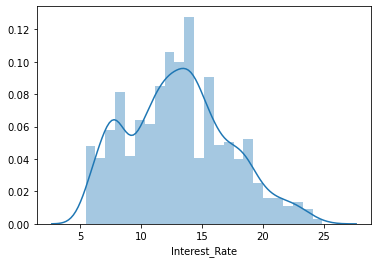

In [16]:
sns.distplot(df_final.Interest_Rate)

## Section 2: Feature Reduction

In [17]:
target = df_final['Interest_Rate']
features = df_final[df_final.columns.difference(['Interest_Rate'])]

display(target, features)

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest_Rate, Length: 2498, dtype: float64

,Amount_Funded_By_Investors,Amount_Requested,Debt_To_Income_Ratio,Employment_Length,Fico_Range,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,...,State_SC,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,20000.00,20000.0,14.90,1.0,737.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,19200.00,19200.0,28.36,2.0,717.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35000.00,35000.0,23.81,2.0,692.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9975.00,10000.0,14.30,5.0,697.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12000.00,12000.0,18.78,9.0,697.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,29950.00,30000.0,19.23,8.0,707.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,16000.00,16000.0,21.54,10.0,742.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2497,10000.00,10000.0,4.89,10.0,682.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,6000.00,6000.0,16.66,5.0,677.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


- **RFE Method:**

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=10)

rfe = rfe.fit(features,target)

In [19]:
RFE_imp_vars = features.columns[rfe.get_support()]
list(RFE_imp_vars)

['Home_Ownership_MORTGAGE',
 'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Home_Ownership_OWN',
 'Home_Ownership_RENT',
 'Loan_Purpose_debt_consolidation',
 'State_DE',
 'State_MT',
 'State_SD',
 'State_VT']

- **f_regresion Method:**

In [20]:
from sklearn.feature_selection import f_regression

f_reg, p_val = f_regression(features,target)

f_reg = pd.Series(f_reg)
p_val = pd.Series(p_val)
cols = pd.Series(features.columns)

In [21]:
f_reg_res = pd.concat([cols,f_reg,p_val],axis=1)
f_reg_res

,0,1,2
0,Amount_Funded_By_Investors,320.943542,1.293368e-67
1,Amount_Requested,310.361494,1.438909e-65
2,Debt_To_Income_Ratio,77.201353,2.813324e-18
3,Employment_Length,7.081229,7.839458e-03
4,Fico_Range,2559.962187,0.000000e+00
...,...,...,...
68,State_VT,6.681905,9.795894e-03
69,State_WA,0.026121,8.716178e-01
70,State_WI,1.003914,3.164624e-01
71,State_WV,0.941296,3.320387e-01


In [22]:
f_reg_res.columns = ['cols','F_values','p_values']

In [23]:
top_10_f_reg = f_reg_res.sort_values(by=['F_values'],ascending=False).head(10)

list(top_10_f_reg.cols)

['Fico_Range',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Revolving_CREDIT_Balance']

- **SelectKBest Method:**

In [24]:
from sklearn.feature_selection import SelectKBest,f_classif ,chi2

selector = SelectKBest(f_classif, k=10)

selector.fit(features, target)

SelectKBest()

In [25]:
K_Best_10 = features.columns[selector.get_support()]

list(K_Best_10)

['Amount_Funded_By_Investors',
 'Fico_Range',
 'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IA',
 'State_IN',
 'State_MS']

- **Correlation Method:**

In [26]:
df_final.corrwith(df_final.Interest_Rate)

Amount_Requested              0.332554
Amount_Funded_By_Investors    0.337540
Loan_Length                   0.424220
Debt_To_Income_Ratio          0.173211
Monthly_Income                0.037862
                                ...   
Home_Ownership_NONE          -0.027003
Home_Ownership_OTHER          0.031876
Home_Ownership_OWN           -0.011259
Home_Ownership_RENT           0.075419
Interest_Rate                 1.000000
Length: 74, dtype: float64

In [27]:
column_names = pd.Series(list(df_final.corrwith(df_final.Interest_Rate).index),name='Column_Names')
r_values =  pd.Series(list(df_final.corrwith(df_final.Interest_Rate)),name='r_values')

corr = pd.concat([column_names,r_values],axis=1)

In [28]:
corr_12 = corr.sort_values(by=['r_values'],ascending=False).head(12)

list(corr_12['Column_Names'])

['Interest_Rate',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Revolving_CREDIT_Balance',
 'Open_CREDIT_Lines',
 'Home_Ownership_RENT',
 'Employment_Length',
 'State_VT']

- **Final Variables:**

In [29]:
Final_Vars = {'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_small_business',
 'State_MT',
 'State_SD',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
'Amount_Funded_By_Investors',
 'Fico_Range',
 'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IA',
 'State_IN',
 'State_MS',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance'}

In [30]:
Final_Vars = list(Final_Vars)

features2 = df_final[Final_Vars]

features2

,Loan_Purpose_home_improvement,Loan_Purpose_moving,Home_Ownership_RENT,Loan_Purpose_major_purchase,Loan_Length,Debt_To_Income_Ratio,Loan_Purpose_small_business,Revolving_CREDIT_Balance,Amount_Funded_By_Investors,Loan_Purpose_house,...,Fico_Range,Loan_Purpose_debt_consolidation,Inquiries_in_the_Last_6_Months,Amount_Requested,Loan_Purpose_educational,State_IA,State_IN,State_SD,State_MS,State_MT
0,0,0,0,0,36,14.90,0,14272.0,20000.00,0,...,737.0,1,2.0,20000.0,0,0,0,0,0,0
1,0,0,0,0,36,28.36,0,11140.0,19200.00,0,...,717.0,1,1.0,19200.0,0,0,0,0,0,0
2,0,0,0,0,60,23.81,0,21977.0,35000.00,0,...,692.0,1,1.0,35000.0,0,0,0,0,0,0
3,0,0,0,0,36,14.30,0,9346.0,9975.00,0,...,697.0,1,0.0,10000.0,0,0,0,0,0,0
4,0,0,1,0,36,18.78,0,14469.0,12000.00,0,...,697.0,0,0.0,12000.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,60,19.23,0,45880.0,29950.00,0,...,707.0,1,1.0,30000.0,0,0,0,0,0,0
2496,1,0,0,0,60,21.54,0,18898.0,16000.00,0,...,742.0,0,1.0,16000.0,0,0,0,0,0,0
2497,0,0,0,0,36,4.89,0,4544.0,10000.00,0,...,682.0,1,0.0,10000.0,0,0,0,0,0,0
2498,0,0,1,1,36,16.66,0,7753.0,6000.00,0,...,677.0,0,0.0,6000.0,0,0,0,0,0,0


- **VIF:**

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [32]:
VIF = [variance_inflation_factor(features2.values,i) for i in range(features2.shape[1])]

In [33]:
VIF = pd.Series(VIF, name = 'VIF')

cols = pd.Series(features2.columns, name='Column_Name')

VIF_res = pd.concat([cols,VIF],axis=1)

VIF_10 = VIF_res.sort_values(by=['VIF']).head(10)

In [34]:
Final_Vars.append('Interest_Rate')

df_final = df_final[Final_Vars]

df_final

,Loan_Purpose_home_improvement,Loan_Purpose_moving,Home_Ownership_RENT,Loan_Purpose_major_purchase,Loan_Length,Debt_To_Income_Ratio,Loan_Purpose_small_business,Revolving_CREDIT_Balance,Amount_Funded_By_Investors,Loan_Purpose_house,...,Loan_Purpose_debt_consolidation,Inquiries_in_the_Last_6_Months,Amount_Requested,Loan_Purpose_educational,State_IA,State_IN,State_SD,State_MS,State_MT,Interest_Rate
0,0,0,0,0,36,14.90,0,14272.0,20000.00,0,...,1,2.0,20000.0,0,0,0,0,0,0,8.90
1,0,0,0,0,36,28.36,0,11140.0,19200.00,0,...,1,1.0,19200.0,0,0,0,0,0,0,12.12
2,0,0,0,0,60,23.81,0,21977.0,35000.00,0,...,1,1.0,35000.0,0,0,0,0,0,0,21.98
3,0,0,0,0,36,14.30,0,9346.0,9975.00,0,...,1,0.0,10000.0,0,0,0,0,0,0,9.99
4,0,0,1,0,36,18.78,0,14469.0,12000.00,0,...,0,0.0,12000.0,0,0,0,0,0,0,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,60,19.23,0,45880.0,29950.00,0,...,1,1.0,30000.0,0,0,0,0,0,0,16.77
2496,1,0,0,0,60,21.54,0,18898.0,16000.00,0,...,0,1.0,16000.0,0,0,0,0,0,0,14.09
2497,0,0,0,0,36,4.89,0,4544.0,10000.00,0,...,1,0.0,10000.0,0,0,0,0,0,0,13.99
2498,0,0,1,1,36,16.66,0,7753.0,6000.00,0,...,0,0.0,6000.0,0,0,0,0,0,0,12.42


- **Spliting Data into Training and Testing:**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train,test = train_test_split(df_final, test_size = 0.3, random_state = 123)

## Section 3: Modelling

In [37]:
import statsmodels.formula.api as smf

In [38]:
model = smf.ols('Interest_Rate ~ Loan_Purpose_educational + Loan_Purpose_house + Home_Ownership_NONE +State_MS+ Loan_Length+ Fico_Range+ State_IA+Loan_Purpose_other+ Loan_Purpose_credit_card+ Home_Ownership_RENT+State_IN+ Loan_Purpose_small_business+ State_SD+Debt_To_Income_Ratio+ Loan_Purpose_debt_consolidation+Home_Ownership_OTHER+ Amount_Requested+ Revolving_CREDIT_Balance+State_MT+ Loan_Purpose_home_improvement+Amount_Funded_By_Investors+ Loan_Purpose_moving+Inquiries_in_the_Last_6_Months+ Loan_Purpose_major_purchase', data=train).fit()

print(model.summary2())

                        Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.766    
Dependent Variable:       Interest_Rate        AIC:                    7430.2259
Date:                     2021-01-04 11:19     BIC:                    7566.8816
No. Observations:         1748                 Log-Likelihood:         -3690.1  
Df Model:                 24                   F-statistic:            239.4    
Df Residuals:             1723                 Prob (F-statistic):     0.00     
R-squared:                0.769                Scale:                  4.0496   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       67.2826   1.1356  59.2475 0.0000 65.0552 69.5099
Loan_Purpose_educational         0.2105   0.5780   0.

- **Now reducing Varibales on basis of P-value:**

In [39]:
model = smf.ols('Interest_Rate ~ Loan_Length+ Fico_Range+ Amount_Funded_By_Investors+ Inquiries_in_the_Last_6_Months', data=train).fit()

print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.761    
Dependent Variable:      Interest_Rate        AIC:                    7449.7296
Date:                    2021-01-04 11:19     BIC:                    7477.0607
No. Observations:        1748                 Log-Likelihood:         -3719.9  
Df Model:                4                    F-statistic:            1390.    
Df Residuals:            1743                 Prob (F-statistic):     0.00     
R-squared:               0.761                Scale:                  4.1418   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      66.6884   1.0151  65.6968 0.0000 64.6975 68.6794
Loan_Length                     0.1375   0.0053  25.9259 0.0000 

## Section 4: Post Model

- **Prediction on Train Model:**

In [42]:
train['pred'] = model.predict(train)

train.head(3)

,Loan_Purpose_home_improvement,Loan_Purpose_moving,Home_Ownership_RENT,Loan_Purpose_major_purchase,Loan_Length,Debt_To_Income_Ratio,Loan_Purpose_small_business,Revolving_CREDIT_Balance,Amount_Funded_By_Investors,Loan_Purpose_house,...,Inquiries_in_the_Last_6_Months,Amount_Requested,Loan_Purpose_educational,State_IA,State_IN,State_SD,State_MS,State_MT,Interest_Rate,pred
1782,0,0,1,0,36,7.65,0,4276.0,7000.0,0,...,0.0,7000.0,0,0,0,0,0,0,7.90,10.861630
1646,0,0,1,0,36,12.85,0,3210.0,3000.0,0,...,0.0,3000.0,0,0,0,0,0,0,7.14,8.557455
797,0,0,1,0,60,21.88,0,7903.0,16750.0,0,...,0.0,16750.0,0,0,0,0,0,0,21.48,19.451737


- **Prediction on Train Model:**

In [43]:
test['pred'] = model.predict(test)

test.head(3)

,Loan_Purpose_home_improvement,Loan_Purpose_moving,Home_Ownership_RENT,Loan_Purpose_major_purchase,Loan_Length,Debt_To_Income_Ratio,Loan_Purpose_small_business,Revolving_CREDIT_Balance,Amount_Funded_By_Investors,Loan_Purpose_house,...,Inquiries_in_the_Last_6_Months,Amount_Requested,Loan_Purpose_educational,State_IA,State_IN,State_SD,State_MS,State_MT,Interest_Rate,pred
1239,0,0,0,0,36,28.15,0,28631.0,30225.0,0,...,0.0,30225.0,0,0,0,0,0,0,17.77,14.165560
2065,0,0,1,0,60,8.83,0,15308.0,29175.0,0,...,2.0,29175.0,0,0,0,0,0,0,21.00,19.483890
2441,0,0,0,0,60,9.55,0,17259.0,12000.0,0,...,0.0,12000.0,0,0,0,0,0,0,12.68,15.305725


## Section 4: Model Evaluation

In [44]:
from sklearn import metrics
import scipy.stats as stats

- **MAPE**
- **MSE**
- **Correlation**

In [45]:
MAPE_train = round(np.mean(np.abs((train.Interest_Rate - train.pred)/train.Interest_Rate))*100,2)
print('MAPE_train',MAPE_train)

MSE_train = metrics.mean_squared_error(train.Interest_Rate , train.pred)
print('MSE_train',MSE_train)

Corr_train = stats.stats.pearsonr(train.Interest_Rate , train.pred)
print('Corr_train',Corr_train)

MAPE_train 13.6
MSE_train 4.1299327818784
Corr_train (0.8725128524223071, 0.0)


In [46]:
MAPE_test = round(np.mean(np.abs((test.Interest_Rate - test.pred)/test.Interest_Rate))*100,2)
print('MAPE_test',MAPE_test)

MSE_test = metrics.mean_squared_error(test.Interest_Rate , test.pred)
print('MSE_test',MSE_test)

Corr_test = stats.stats.pearsonr(test.Interest_Rate , test.pred)
print('Corr_test',Corr_test)

MAPE_test 13.49
MSE_test 4.327010606249639
Corr_test (0.8701209553917886, 4.6554682259430766e-232)


- **Decile Analysis:**

In [49]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)

In [50]:
avg_actual = train[['Deciles','Interest_Rate']].groupby(train.Deciles).mean().sort_index(ascending=False)['Interest_Rate']

avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

Decile_analysis_train

,Interest_Rate,pred
Deciles,,
9,19.796457,19.234944
8,16.747829,16.445957
7,15.750743,15.286448
6,14.682241,14.561458
5,13.645371,13.853277
4,12.646514,13.010304
3,11.329828,11.950689
2,9.725886,10.746747
1,8.605029,9.165768


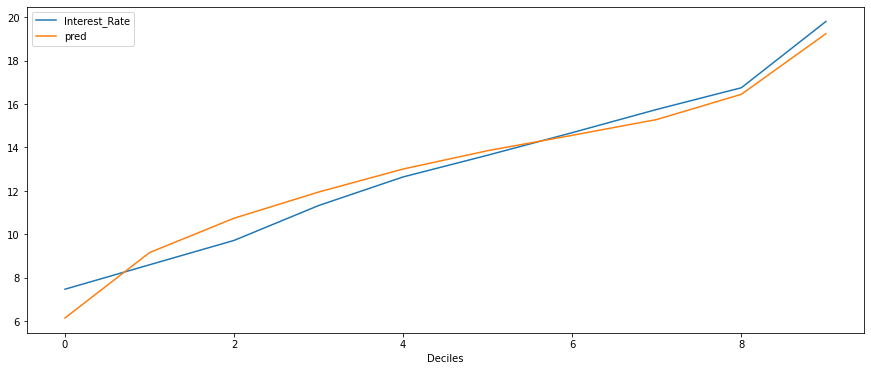

In [58]:
Decile_analysis_train.plot(kind='line', figsize=(15,6))

In [55]:
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','Interest_Rate']].groupby(test.Deciles).mean().sort_index(ascending=False)['Interest_Rate']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

In [60]:
Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

Decile_analysis_test

,Interest_Rate,pred
Deciles,,
9,19.935867,19.394507
8,17.067333,16.518407
7,15.804267,15.271009
6,14.300133,14.419620
5,13.697467,13.742423
4,12.734267,12.964243
3,11.635867,11.974292
2,9.984267,10.777445
1,8.924000,9.221424


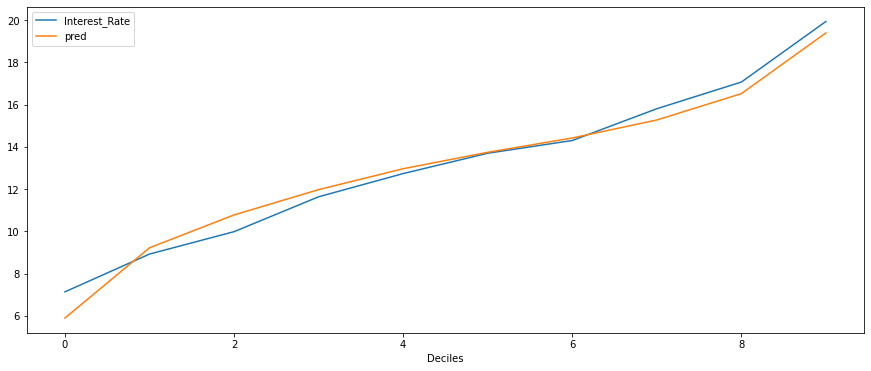

In [61]:
Decile_analysis_test.plot(kind='line', figsize=(15,6))